**Mushroom Classification Problem**
- to find if mushroom is edible or poisonous to eat

In [90]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
mushdataset = pd.read_csv('mushrooms.csv')

**Exploratory Data Analysis**

**CORRELATION ANALYSIS**

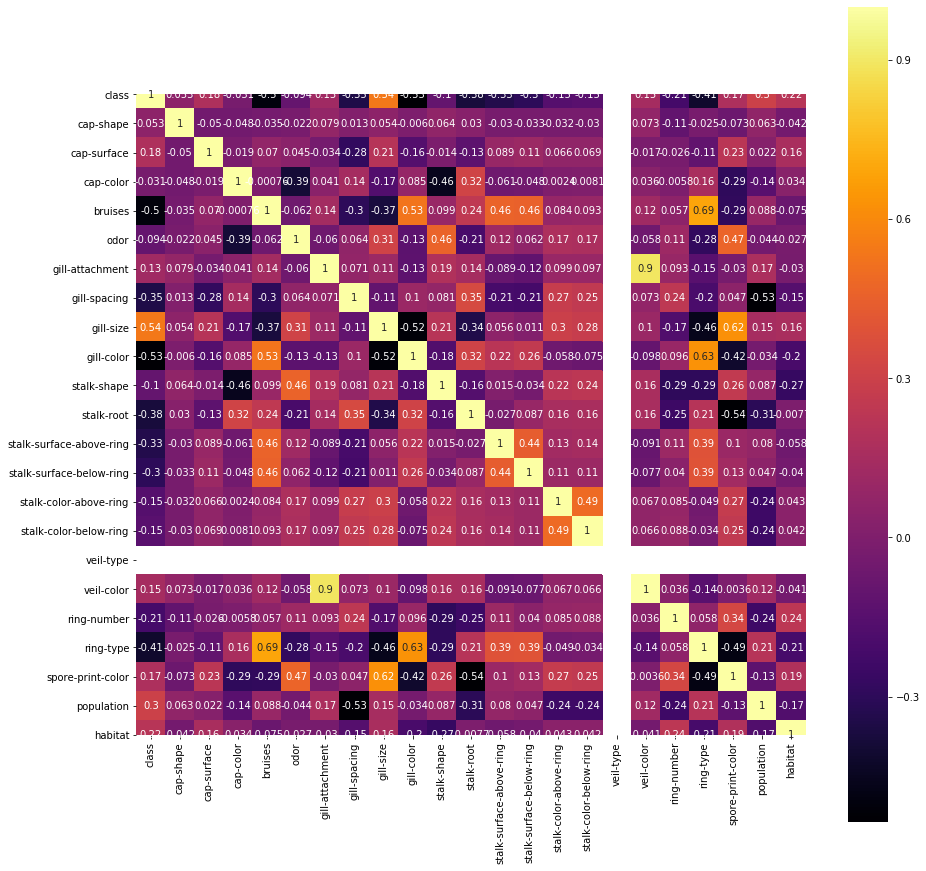

In [119]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(mushdataset.corr(),annot=True, square=True, cmap='inferno')

In [92]:
mushdata = mushdataset
mushdata.shape

(8124, 23)

In [93]:
mushdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [94]:
mushdata.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [95]:
mushdata.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

**NULL ANALYSIS**

In [96]:
mushdata.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [97]:
# Label Encoding of the data points
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in mushdata.columns:
    mushdata[col] = le.fit_transform(mushdata[col])
mushdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [98]:
# split of the dataset
from sklearn.model_selection import train_test_split

Y = mushdata['class']
X = mushdata.drop(['class'],axis=1)

In [99]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)

In [100]:
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((5686, 22), (2438, 22), (5686,), (2438,))

**Predictions**

**LOGISTIC REGRESSION**

In [101]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)
print(f'the model score is {lr.score(Xtest,Ytest)}')

the model score is 0.9474979491386383


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
from sklearn.metrics import classification_report, f1_score
yPred = lr.predict(Xtest)
print("classification table")
print(classification_report(yPred,Ytest))
print(f'f1 score is {f1_score(yPred,Ytest)}')

classification table
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1256
           1       0.94      0.95      0.95      1182

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

f1 score is 0.9461732548359967


**SUPPORT VECTOR MACHINE CLASSIFIER**

In [103]:
# Support Vector Machine
from sklearn.svm import SVC
svcm = SVC()
svcm.fit(Xtrain,Ytrain)
print(svcm.score(Xtest,Ytest))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0


In [104]:
yPred = svcm.predict(Xtest)
print("classification table")
print(classification_report(yPred,Ytest))
print(f'f1 score is {f1_score(yPred,Ytest)}')

classification table
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1242
           1       1.00      1.00      1.00      1196

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

f1 score is 1.0


**DECISION TREE CLASSIFIER**

In [105]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,Ytrain)
print(dtc.score(Xtest,Ytest))

1.0


In [106]:
yPred = dtc.predict(Xtest)
print("classification table")
print(classification_report(yPred,Ytest))
print(f'f1 score is {f1_score(yPred,Ytest)}')

classification table
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1242
           1       1.00      1.00      1.00      1196

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

f1 score is 1.0


**RANDOM FOREST CLASSIFIER**

In [107]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = DecisionTreeClassifier()
rfc.fit(Xtrain,Ytrain)
print(rfc.score(Xtest,Ytest))

1.0


In [108]:
yPred = rfc.predict(Xtest)
print("classification table")
print(classification_report(yPred,Ytest))
print(f'f1 score is {f1_score(yPred,Ytest)}')

classification table
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1242
           1       1.00      1.00      1.00      1196

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

f1 score is 1.0
